#              IMDB DATA ANALYSIS

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

### Reading the data from the file

In [2]:
movies = pd.read_csv('movie_metadata.csv')
print movies.shape
movies.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Removing duplicates and cleaning data

In [3]:
movies.dropna(inplace=True)
# Changing the type from float to int
movies.title_year = movies.title_year.astype(np.int64)
movies.gross = movies.gross.astype(np.int64)
movies.budget = movies.budget.astype(np.int64)
movies = movies.drop_duplicates(['movie_title'])
print movies.shape
list(movies.columns.values)

(3655, 28)


['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

### Top 10 movies with highest gross

In [4]:
top_10_gross_movie = movies[['movie_title', 'imdb_score', 'director_name', 'title_year', 'gross', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'genres']].sort_values('gross', ascending=False)[:10]
top_10_gross_movie

,movie_title,imdb_score,director_name,title_year,gross,actor_1_name,actor_2_name,actor_3_name,genres
0,Avatar,7.9,James Cameron,2009,760505847,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi
26,Titanic,7.7,James Cameron,1997,658672302,Leonardo DiCaprio,Kate Winslet,Gloria Stuart,Drama|Romance
29,Jurassic World,7.0,Colin Trevorrow,2015,652177271,Bryce Dallas Howard,Judy Greer,Omar Sy,Action|Adventure|Sci-Fi|Thriller
17,The Avengers,8.1,Joss Whedon,2012,623279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi
66,The Dark Knight,9.0,Christopher Nolan,2008,533316061,Christian Bale,Heath Ledger,Morgan Freeman,Action|Crime|Drama|Thriller
240,Star Wars: Episode I - The Phantom Menace,6.5,George Lucas,1999,474544677,Natalie Portman,Liam Neeson,Ian McDiarmid,Action|Adventure|Fantasy|Sci-Fi
3024,Star Wars: Episode IV - A New Hope,8.7,George Lucas,1977,460935665,Harrison Ford,Peter Cushing,Kenny Baker,Action|Adventure|Fantasy|Sci-Fi
8,Avengers: Age of Ultron,7.5,Joss Whedon,2015,458991599,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi
3,The Dark Knight Rises,8.5,Christopher Nolan,2012,448130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller
582,Shrek 2,7.2,Andrew Adamson,2004,436471036,Rupert Everett,Jennifer Saunders,Conrad Vernon,Adventure|Animation|Comedy|Family|Fantasy|Romance


### List of top 5 Actor_1s per year who has highest total gross from the year 2010 - 2017

In [5]:
actors_gross = movies[movies['title_year'].isin(range(2010, 2017))]
actors_gross = actors_gross[['actor_1_name', 'gross', 'title_year']]
actors_gross.sort_values(['title_year', 'gross'], ascending=False, inplace=True)
actors_gross = actors_gross.groupby(['title_year']).head(5).reset_index(drop=True)
actors_gross.set_index(['title_year', 'actor_1_name'], inplace=True)
actors_gross

gross
title_year actor_1_name                  
2016       Robert Downey Jr.    407197282
           Ryan Reynolds        363024263
           Scarlett Johansson   362645141
           Henry Cavill         330249062
           Steve Coogan         323505540
2015       Bryce Dallas Howard  652177271
           Chris Hemsworth      458991599
           Amy Poehler          356454367
           Jason Statham        350034110
           Steve Carell         336029560
2014       Bradley Cooper       350123553
           Jennifer Lawrence    337103873
           Bradley Cooper       333130696
           Scarlett Johansson   259746958
           Morgan Freeman       257756197
2013       Jennifer Lawrence    424645577
           Robert Downey Jr.    408992272
           Josh Gad             400736600
           Steve Carell         368049635
           Henry Cavill         291021565
2012       Chris Hemsworth      623279547
           Tom Hardy            448130642
           Jennifer Lawrence    407999255
           Albert Finney        304360277
           Robert Pattinson     292298923
2011       Glenn Morshower      352358779
           Bradley Cooper       254455986
           Johnny Depp          241063875
           Paul Walker          209805005
           Tom Cruise           209364921
2010       Tom Hanks            414984497
           Johnny Depp          334185206
           Robert Downey Jr.    312057433
           Robert Pattinson     300523113
           Leonardo DiCaprio    292568851

### List of top 5 Directors per year who have highest total gross from the year 2010 - 2017

In [6]:
directors_gross = movies[movies['title_year'].isin(range(2010, 2017))]
directors_gross = directors_gross[['director_name', 'gross', 'title_year']]
directors_gross.sort_values(['title_year', 'gross'], ascending=False, inplace=True)
directors_gross = directors_gross.groupby(['title_year']).head(5).reset_index(drop=True)
directors_gross.set_index(['title_year', 'director_name'], inplace=True)
directors_gross

gross
title_year director_name               
2016       Anthony Russo      407197282
           Tim Miller         363024263
           Jon Favreau        362645141
           Zack Snyder        330249062
           Yarrow Cheney      323505540
2015       Colin Trevorrow    652177271
           Joss Whedon        458991599
           Pete Docter        356454367
           James Wan          350034110
           Kyle Balda         336029560
2014       Clint Eastwood     350123553
           Francis Lawrence   337103873
           James Gunn         333130696
           Anthony Russo      259746958
           Phil Lord          257756197
2013       Francis Lawrence   424645577
           Shane Black        408992272
           Chris Buck         400736600
           Pierre Coffin      368049635
           Zack Snyder        291021565
2012       Joss Whedon        623279547
           Christopher Nolan  448130642
           Gary Ross          407999255
           Sam Mendes         304360277
           Bill Condon        292298923
2011       Michael Bay        352358779
           Todd Phillips      254455986
           Rob Marshall       241063875
           Justin Lin         209805005
           Brad Bird          209364921
2010       Lee Unkrich        414984497
           Tim Burton         334185206
           Jon Favreau        312057433
           David Slade        300523113
           Christopher Nolan  292568851

### Relation between imdb_score and movie_facebook_likes

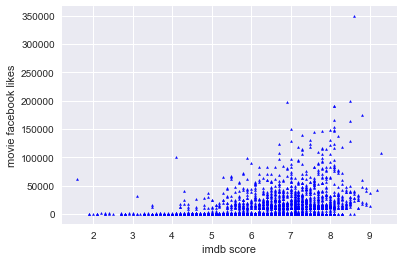

In [7]:
#%matplotlib inline
score_likes = movies[['imdb_score', 'movie_facebook_likes']]
plt.scatter(score_likes['imdb_score'].values, score_likes['movie_facebook_likes'].values, s=[5], marker='^', c='b')
plt.xlabel('imdb score')
plt.ylabel('movie facebook likes')
plt.show()

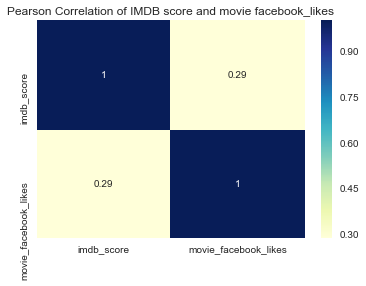

In [8]:
plt.title('Pearson Correlation of IMDB score and movie facebook_likes')

sns.heatmap(score_likes.corr(), annot=True, cmap="YlGnBu")

### List of movies with respective Return on Investment, sorted in Descending order 

In [9]:
#The return on investment formula is: ROI = (Net Profit / Cost of Investment) x 100
movie_returns = movies.loc[:, ['movie_title', 'gross', 'budget']]
movie_returns['Profit'] = movie_returns['gross'] - movie_returns['budget']
movie_returns['Returns'] = (movie_returns['Profit']/movie_returns['budget'])*100
movie_returns.Returns = movie_returns.Returns.astype(np.int64)
movie_returns.sort_values('Returns', ascending=False, inplace=True)
movie_returns.head()

,movie_title,gross,budget,Profit,Returns
4793,Paranormal Activity,107917283,15000,107902283,719348
4799,Tarnation,592014,218,591796,271466
4707,The Blair Witch Project,140530114,60000,140470114,234116
4984,The Brothers McMullen,10246600,25000,10221600,40886
3278,The Texas Chain Saw Massacre,30859000,83532,30775468,36842


### Top 15 bankable directors, sorted in Descending order

In [10]:
director_returns = movies.loc[:, ['director_name', 'gross', 'budget']]
movie_count = director_returns.groupby('director_name').count()
director_returns = director_returns[director_returns['director_name'].isin(movie_count[movie_count['gross'] > 5].index)]
director_returns = director_returns.groupby('director_name').mean()
director_returns['# movies'] = movie_count['gross']
director_returns['Profit'] = director_returns['gross'] - director_returns['budget']
director_returns['Returns'] = (director_returns['Profit']/director_returns['budget'])*100
director_returns.Returns = director_returns.Returns.astype(np.int64)
director_returns.sort_values('Returns', ascending=False, inplace=True)
director_returns.head(15)

,gross,budget,# movies,Profit,Returns
director_name,,,,,
Tyler Perry,58056291,16500000,6,41556291,251
Todd Phillips,125908004,42800000,7,83108004,194
James Wan,113139457,39671428,7,73468029,185
Jay Roach,144789222,53000000,7,91789222,173
James Cameron,278303701,106928571,7,171375130,160
Steven Spielberg,164569324,65116034,25,99453290,152
Tim Story,98116871,40500000,6,57616871,142
Chris Columbus,147155238,61545454,11,85609784,139
David O. Russell,74364250,31857142,7,42507108,133


### Movies of the directors with high Return on Investment

In [11]:
directors = list(director_returns.head().index.values)
director_movies = movies[['director_name', 'movie_title', 'title_year', 'gross', 'budget']]
director_movies.loc[director_movies['director_name'].isin(directors)]

,director_name,movie_title,title_year,gross,budget
0,James Cameron,Avatar,2009,760505847,237000000
26,James Cameron,Titanic,1997,658672302,200000000
45,James Wan,Furious 7,2015,350034110,190000000
288,James Cameron,Terminator 2: Judgment Day,1991,204843350,102000000
291,James Cameron,True Lies,1994,146282411,115000000
331,Jay Roach,The Campaign,2012,86897182,95000000
440,Todd Phillips,The Hangover Part II,2011,254455986,80000000
606,James Cameron,The Abyss,1989,54222000,69500000
662,Todd Phillips,Due Date,2010,100448498,65000000
695,Jay Roach,Austin Powers in Goldmember,2002,213079163,63000000


#                                    DIRECTOR PROFIT DEPICTION

Using the Pandas dataframe filtering, we can create a new dataframe (Director_profit) containing required columns:

In [12]:
Director_profit = movies[['director_name', 'gross', 'budget']]
Director_profit.head()

,director_name,gross,budget
0,James Cameron,760505847,237000000
1,Gore Verbinski,309404152,300000000
2,Sam Mendes,200074175,245000000
3,Christopher Nolan,448130642,250000000
5,Andrew Stanton,73058679,263700000


In [13]:
Director_profit = Director_profit.groupby('director_name')['gross','budget'].sum()
Director_profit.head()

,gross,budget
director_name,,
Aaron Schneider,9176553,7500000
Aaron Seltzer,48546578,20000000
Abel Ferrara,1227324,12500000
Adam Goldberg,2580,1650000
Adam Marcus,15935068,2500000


### Plotting a Profit Depiction Plot based on the Aggregate Budget and Gross Income

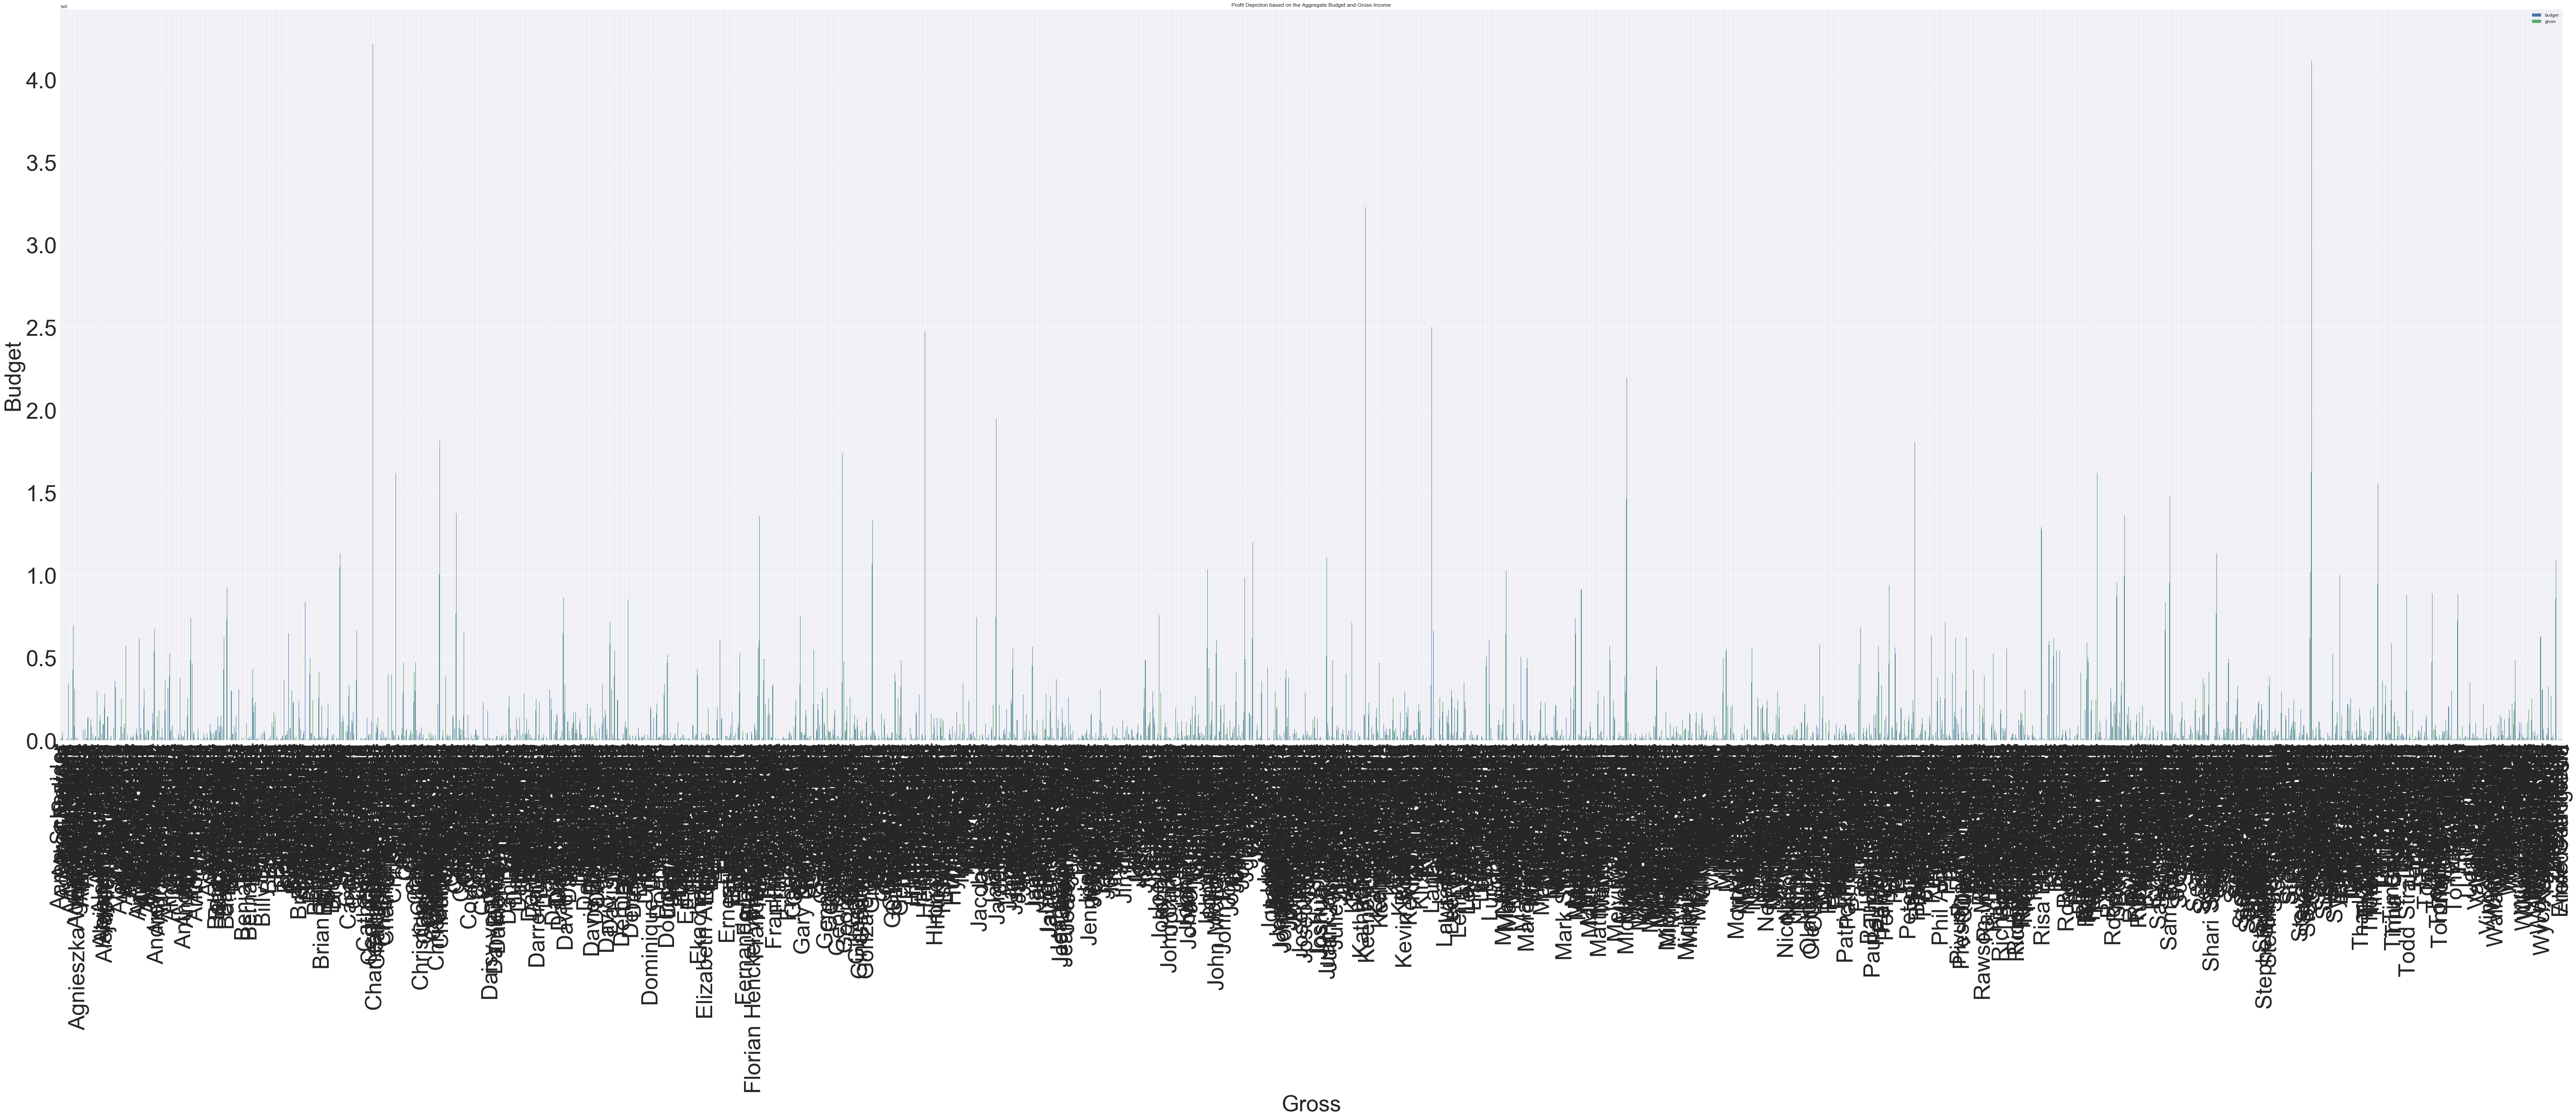

In [14]:
ax = Director_profit[['budget','gross']].plot(kind='bar', title ="Profit Depiction based on the Aggregate Budget and Gross Income", figsize=(100, 30), legend=True, fontsize=50)
ax.set_xlabel("Gross", fontsize=50)
ax.set_ylabel("Budget", fontsize=50)
plt.show()

### Data Normalization

In [15]:
X = Director_profit.values
# Data Normalization
X_std = StandardScaler().fit_transform(X)

C:\Users\Divya\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### Principal Component Analysis

We would like to project on Two Components/Dimensions implementing sklearn's PCA module. The first line of the code contains the parameters "n_components" which states how many PCA components we want to project the dataset onto. Since we are going implement PCA with 2 components - Gross Income and the Budget, therefore we set n_components = 2. The second line of the code calls the "fit_transform" method, which fits the PCA model with the standardised movie_list data X_std and applies the dimensionality reduction on this dataset.

In [16]:
pca = PCA(n_components=2)
x_2d = pca.fit_transform(X_std)

### Drawing a 2D Scatter plot

Applying this specific PCA model with the Director_profit dataset, we can now visualise the first 2 projection components as a 2D scatter plot.

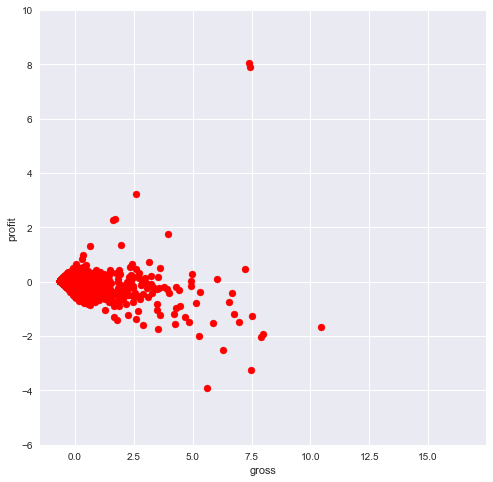

In [17]:
plt.figure(figsize = (8,8))
plt.scatter(x_2d[:,0],x_2d[:,1],color ='red')
plt.ylim(-6,10)
plt.xlabel('gross')
plt.ylabel('profit')
plt.show()

## CORRELATION BETWEEN ALL THE FACEBOOK LIKES

Creating a dataset 'Facebook_likes' with columns that show the facebook likes of Movie, Total Cast, Director and Actors(1,2,3)

In [18]:
Facebook_likes = movies[['movie_facebook_likes', 'director_facebook_likes', 'cast_total_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']]
Facebook_likes.head()

,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
0,33000,0.0,4834,1000.0,936.0,855.0
1,0,563.0,48350,40000.0,5000.0,1000.0
2,85000,0.0,11700,11000.0,393.0,161.0
3,164000,22000.0,106759,27000.0,23000.0,23000.0
5,24000,475.0,1873,640.0,632.0,530.0


### Correlation of Facebook_likes Dataset using Pearson method

 Correlation using pearson method - standard correlation coefficient and min_period is the Minimum number of observations required per pair of columns to have a valid result. This is Currently only available for pearson and spearman correlation.

In [19]:
Facebook_likes.corr(method='pearson', min_periods=1)

,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
movie_facebook_likes,1.000000,0.165829,0.199436,0.126696,0.229505,0.264063
director_facebook_likes,0.165829,1.000000,0.118945,0.090175,0.114827,0.118415
cast_total_facebook_likes,0.199436,0.118945,1.000000,0.946610,0.635908,0.480152
actor_1_facebook_likes,0.126696,0.090175,0.946610,1.000000,0.386744,0.248393
actor_2_facebook_likes,0.229505,0.114827,0.635908,0.386744,1.000000,0.543564
actor_3_facebook_likes,0.264063,0.118415,0.480152,0.248393,0.543564,1.000000


### Set up the Matplotlib figure and Draw the Heatmap using Seaborn

This heatmap is to visually show how strongly correlated the values of the Facebooklikes's columns are to one another. Therefore in this matrix the squares that are of a darker colour are more strongly correlated compared to the ones of lighter colour.

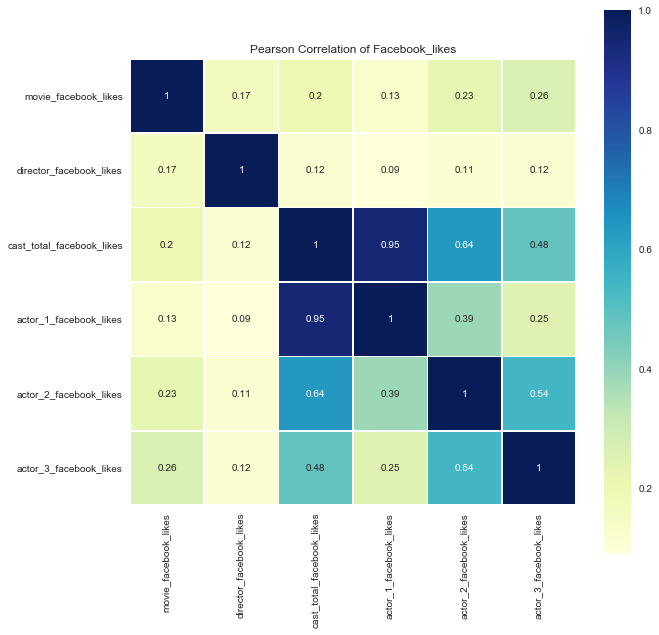

In [20]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))
plt.title('Pearson Correlation of Facebook_likes')

sns.heatmap(Facebook_likes.corr(),linewidths=0.5,vmax=1.0, annot=True, square=True, cmap="YlGnBu")

### Least grossed Movies for the years 2000 - 2017

In [21]:
Movies_gross = movies[movies['title_year'].isin(range(2000,2017))]
Movies_gross = Movies_gross[['movie_title', 'gross', 'title_year']]
Movies_gross.sort_values(['title_year', 'gross'], ascending=True, inplace=True)
Movies_gross = Movies_gross.groupby(['title_year']).head(1).reset_index(drop=True)
Movies_gross.set_index(['title_year', 'movie_title'], inplace=True)
Movies_gross

,,gross
title_year,movie_title,
2000,Anatomy,5725
2001,The Jimmy Show,703
2002,The Slaughter Rule,13134
2003,I Love Your Work,2580
2004,Fighting Tommy Riley,5199
2005,London,12667
2006,In Her Line of Fire,721
2007,Blonde Ambition,5561
2008,Pontypool,3478


### Counting the movies in each language and Counting the movies in each genre

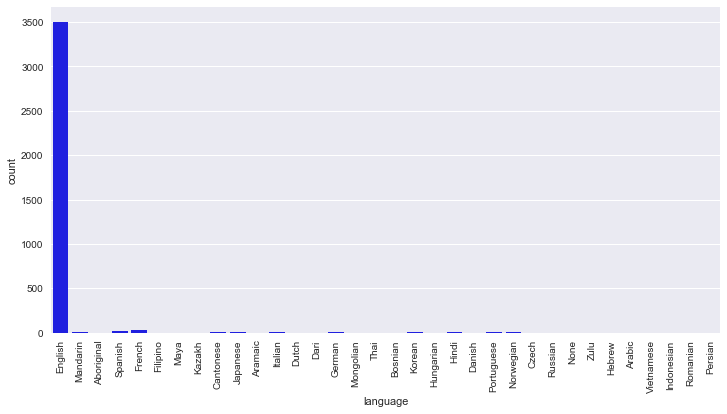

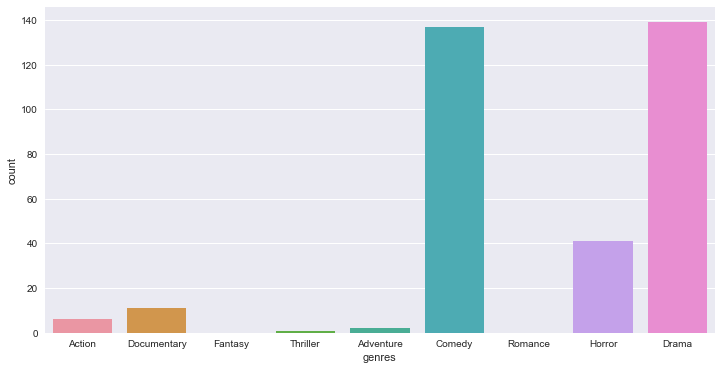

In [22]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'language', data = movies,color='blue')
xt = plt.xticks(rotation=90)
 
plt.figure(figsize = (12, 6))
sns.countplot(x='genres', data=movies, order=['Action', 'Documentary','Fantasy','Thriller','Adventure','Comedy','Romance','Horror','Drama'])

### Profit every year

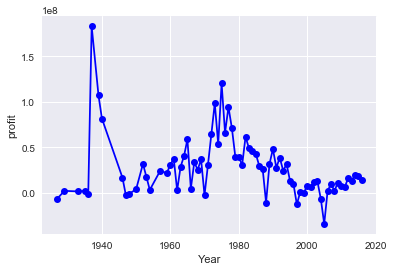

In [23]:
df = movies.copy()
profit = (df['gross']-df['budget'])
return_on_investment_perc=(profit/df['gross'])*100;
df.insert(len(df.columns),'profit',profit)
def plot_vs_year(df, y="gross"):
    df_t = df.pivot_table(index="title_year", values=y, aggfunc=np.mean)
    plt.plot(df_t.index, df_t.values, "-bo")
    plt.ylabel(y)
    plt.xlabel("Year")
plot_vs_year(df, "profit")

### Number of movies per year

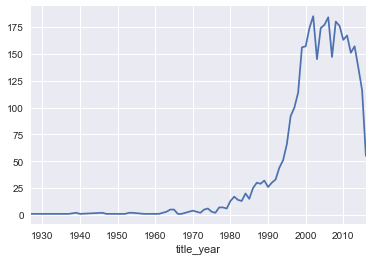

In [24]:
movies_year = movies.groupby(['title_year'])['movie_title'].count()
movies_year.head()
 
movies_year.plot('line')

### Top 10 directors with highest IMDB score

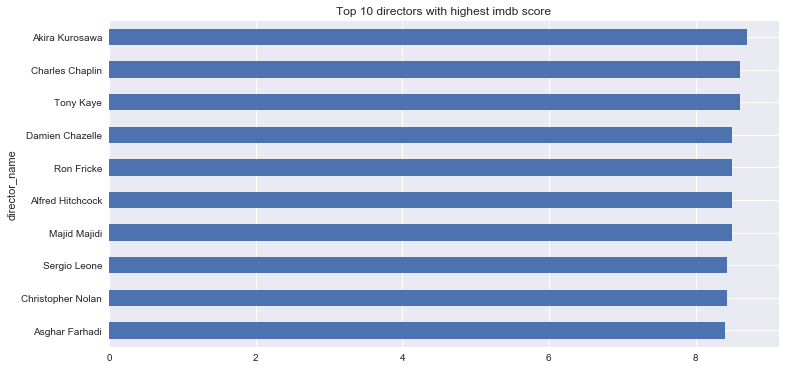

In [25]:
mean_imdb = movies.imdb_score.groupby(movies.director_name).mean().sort_values(ascending=False)
mean_imdb[:10].sort_values().plot.barh(figsize=(12, 6), title='Top 10 directors with highest imdb score')

### Exploratory yearly analysis with dimensions on genres, budget, profit and gross

In [26]:
frame1=pd.DataFrame(movies, columns=['gross', 'budget', 'genres', 'title_year','language','country'])
print frame1.count()
## filter rows after 1980, with english language and country as USA
frame1=frame1[( (frame1.title_year) >= 1980) & (frame1.language=='English')  & (frame1.country=='USA') ]
print frame1.count()
## sanitize the genres column, get the first value from genres
for index, row in frame1.iterrows():
    frame1.loc[index, 'genres_first'] = frame1['genres'][index].split('|')[0]
## sort the data based on title_year and genres
frame1.sort_values( ['title_year', 'genres'] , ascending=False, inplace=True)
# convert gross, budget in Millions 
frame1['gross'] =  (frame1['gross']/1000000)
frame1['budget'] =  (frame1['budget']/1000000)
## find profit %
frame1['profit'] = (((frame1['gross'] - frame1 ['budget']) ))
## round the values in the data frame to 3 decimal places 
frame1=frame1.round(3)
frame1.head(10)

gross         3655
budget        3655
genres        3655
title_year    3655
language      3655
country       3655
dtype: int64
gross         2830
budget        2830
genres        2830
title_year    2830
language      2830
country       2830
dtype: int64


,gross,budget,genres,title_year,language,country,genres_first,profit
1196,102.310,40.0,Horror|Mystery|Thriller,2016,English,USA,Horror,62.310
3112,35.794,10.0,Horror|Mystery|Thriller,2016,English,USA,Horror,25.794
3199,26.583,10.0,Horror|Mystery|Thriller,2016,English,USA,Horror,16.583
3700,56.536,4.9,Horror,2016,English,USA,Horror,51.636
2848,54.257,17.0,Drama|Horror|Thriller,2016,English,USA,Drama,37.257
3698,71.897,15.0,Drama|Horror|Mystery|Sci-Fi|Thriller,2016,English,USA,Drama,56.897
2549,6.463,18.5,Drama,2016,English,USA,Drama,-12.037
2840,61.694,13.0,Drama,2016,English,USA,Drama,48.694
4540,20.773,5.0,Drama,2016,English,USA,Drama,15.773
1825,41.009,27.0,Crime|Drama|Thriller,2016,English,USA,Crime,14.009


### Heatmap depicting yearly gross income and buget

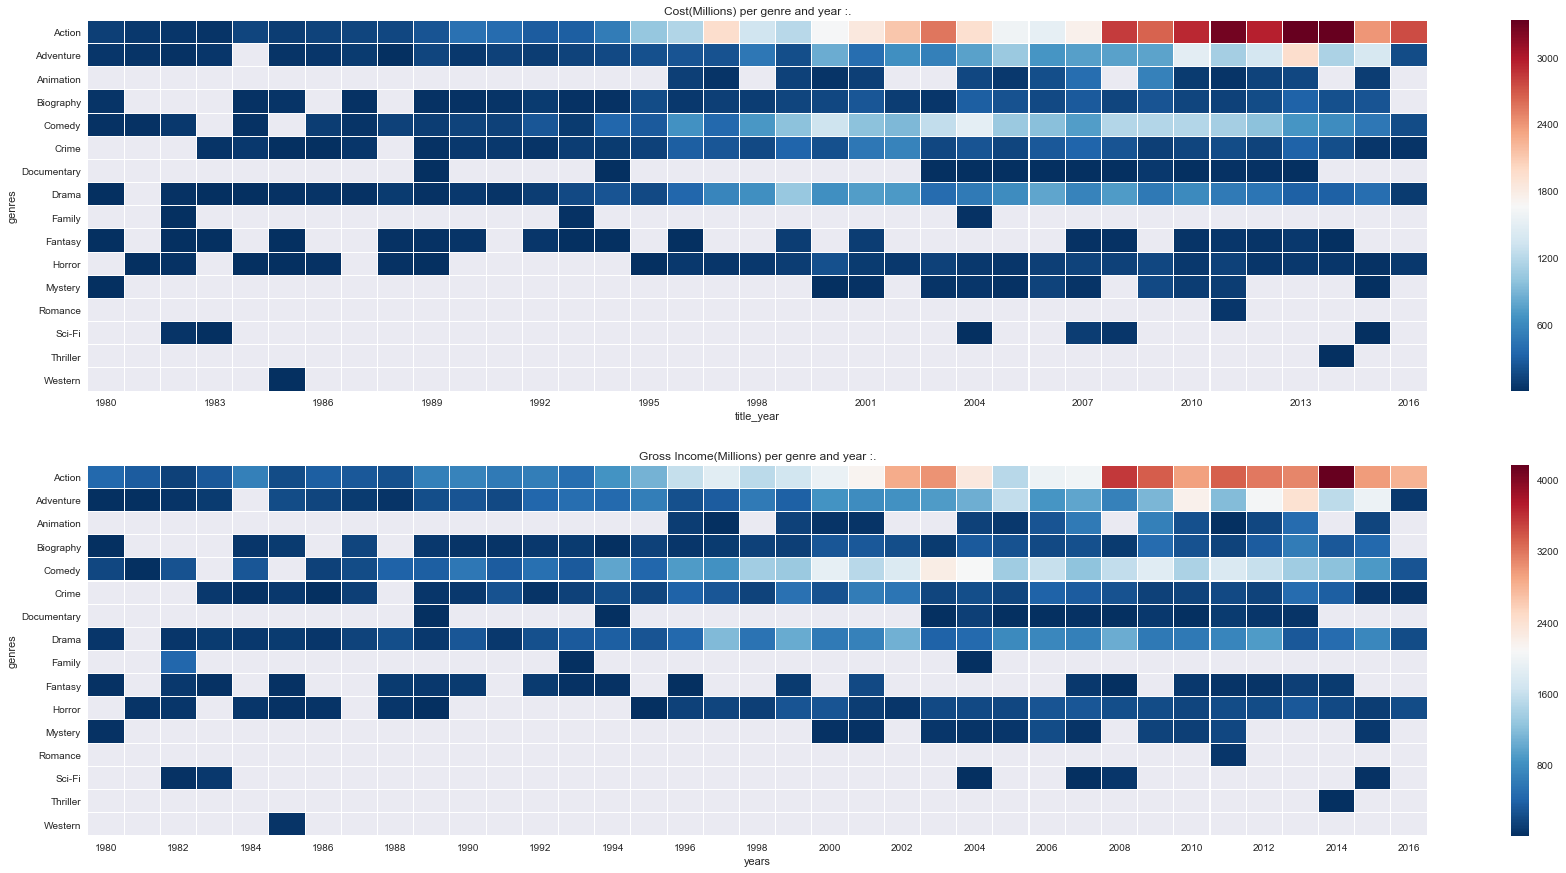

In [27]:
#%matplotlib inline
df_gyBudget = frame1.pivot_table(index = 'genres_first', columns = 'title_year', values = 'budget',aggfunc = np.sum)
df_gyGross = frame1.pivot_table(index = 'genres_first', columns = 'title_year', values = 'gross',aggfunc = np.sum)
f, [axA, axB] = plt.subplots(figsize = (30, 15), nrows = 2)
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(df_gyBudget, xticklabels = 3, linewidths = 0.05, ax = axA, cmap="RdBu_r" )
sns.heatmap(df_gyGross, xticklabels = 2,  cmap="RdBu_r" , linewidths = 0.05, ax = axB)
axA.set_title('Cost(Millions) per genre and year :.')
axA.set_ylabel('genres')
#axA.set_xticklabels([])
axB.set_title('Gross Income(Millions) per genre and year :.')
axB.set_xlabel('years')
axB.set_ylabel('genres')

### Graph between gross and budget for each genres

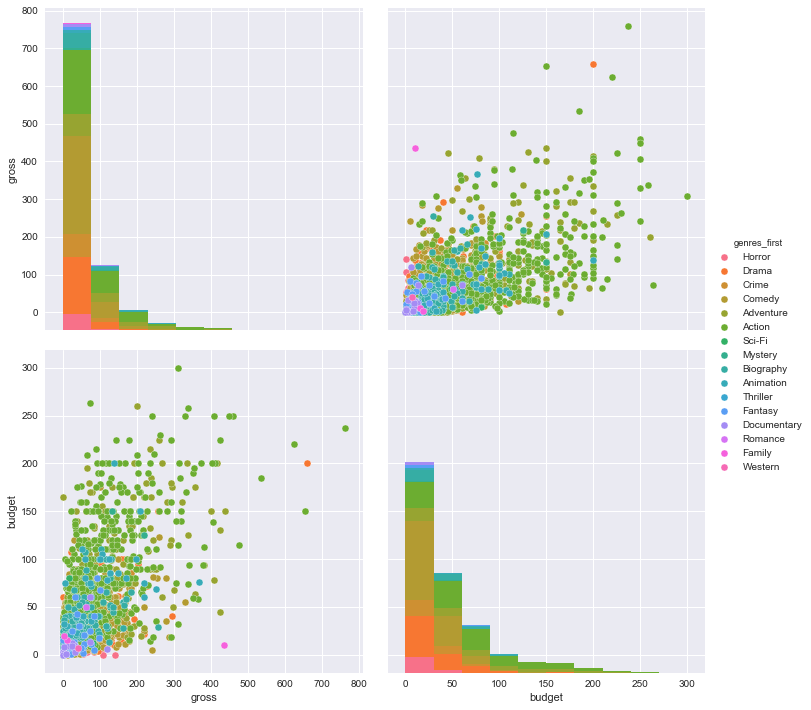

In [28]:
frame2=pd.DataFrame(frame1, columns=['gross', 'budget',  'genres_first'])
sns.pairplot(frame2, hue="genres_first",size=5);

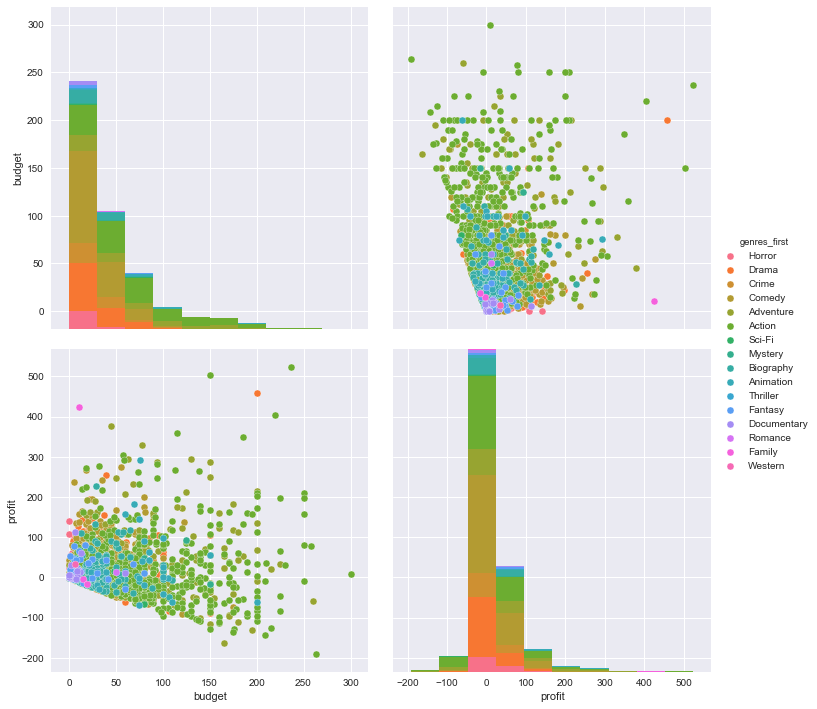

In [29]:
frame2=pd.DataFrame(frame1, columns=[ 'budget', 'profit', 'genres_first'])
sns.pairplot(frame2, hue="genres_first",size=5);

### Graph depicting yearly profit trend for each genres

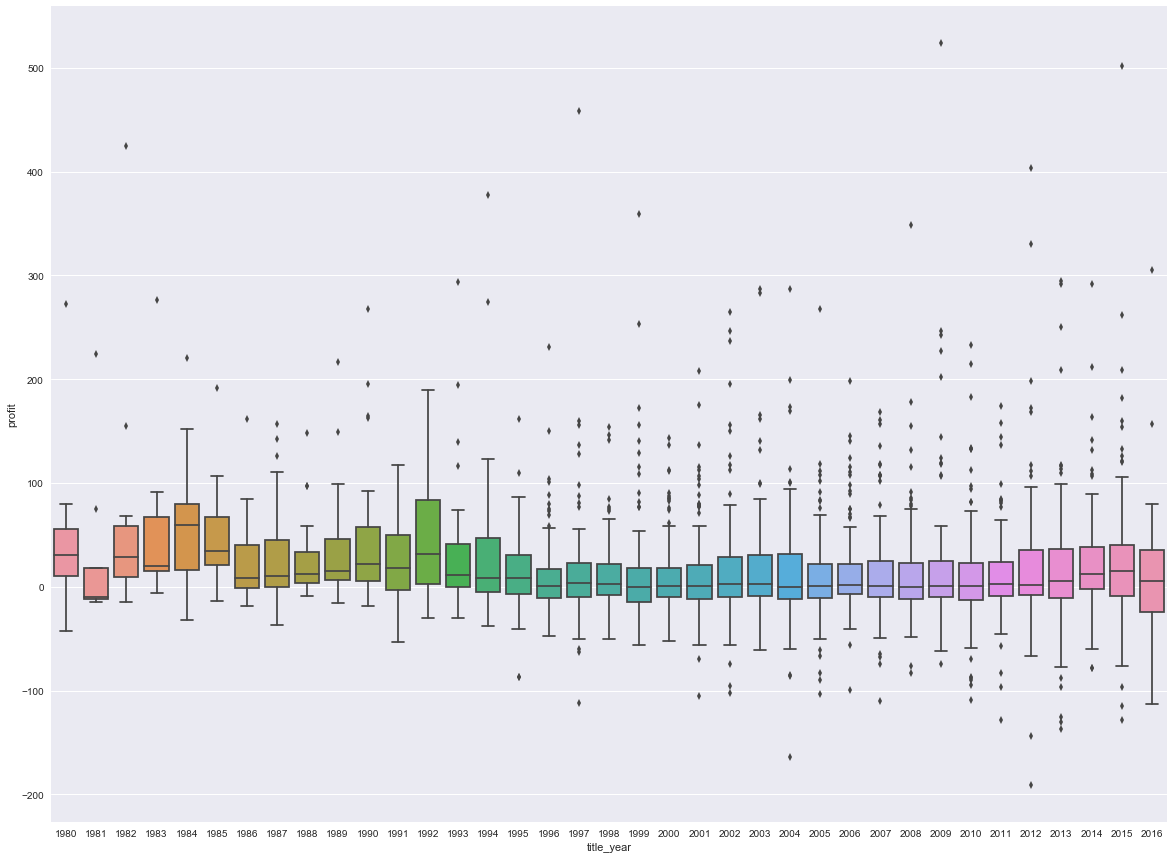

In [30]:
frame2=pd.DataFrame(frame1, columns=[ 'title_year', 'profit','budget', 'genres_first'])
f, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(x ='title_year', y = 'profit',  data = frame2)

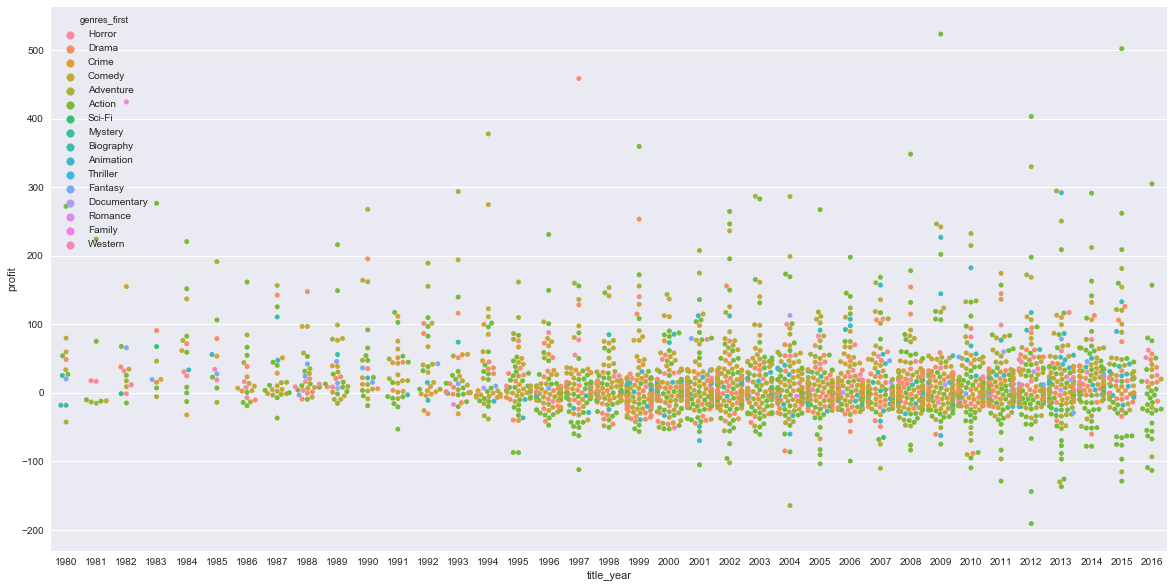

In [31]:
f, ax = plt.subplots(figsize=(20, 10))
sns.swarmplot(x="title_year", y="profit", data=frame2, hue="genres_first" ,ax=ax )